<a href="https://colab.research.google.com/github/AlineFiori/MVP/blob/main/Template_An%C3%A1lise_de_Dados_Pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Aline Fiori Gonçalves

**Matrícula:** 4052025000106

**Dataset:** [Pregnancy](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data?resource=download)

# Descrição do Problema

O conjunto de dados Pregnancy contém dados de mulheres gestantes com a finalidade de identificar caracteterísticas de saúde que possam apresentar risco à gestação. Neste dada set poderemos avaliar aspectos como: idade gestacional, pressáo arterial, glicemia, frequencia cardiaca e o risco gestacional que estes conjuntos de dados trazem à gestação.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- É comprovado cientificamente que a idade da gestante, por sí só, aumenta o risco gestacional. Qual o precentual deste grupo de risco na amostra avaliada e como está classificado em relação ao risco?

- Qual a correlação entre a idade materna e o risco gestacional?

- Dos aspectos de saúde apresentados neste trabalho, qual tem maior influência no risco gestacional?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade gestacional, pressáo arterial, glicemia e frequencia cardiaca), o objetivo é prever a qual o risco gestacional.

## Seleção de Dados

O dataset Pregnancy já está curado e pronto para uso, não sendo necessárias intervenções como filtros e preeenchimentos de missing, para seguirmos com a analise.

## Atributos do Dataset

O dataset Pregnancy contém 1.014 amostras, 07 colunas, e 03 classificações diferentes de risco gestacional.

Possui cinco atributos:

- ***Age*** (idade em anos da gestante)
- ***SystolicBP*** (valor máximo da pressão arterial em mmHg, durante a gravidez)
- ***DiastolicBP*** (valor mínimo da pressão arterial em mmHg, durante a gravidez)
- ***BS (Blood Glicose)*** (níveis de glicose no sangue em termos de concentração molar, mmol/L)
- ***BodyTemp*** (xxxxxxxxxxxxxxxxxxxxxxxxxxxxx)
- ***HeartRate*** (frequência cardíaca normal em repouso, em batimentos por minuto)
- ***Risk Level*** (nível de intensidade de risco previsto durante a gravidez)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [27]:
# Importar bibliotecas
import pandas as pd #manipulação e análise de dados
import numpy as np #computação numérica e científica em Python
import matplotlib.pyplot as plt #plotagem e visualização de dados
import seaborn as sns #visualização de dados científicos

In [28]:
# Link do GitHub em que o dataset 'Pregnancy' está salvo
url_github = 'https://github.com/AlineFiori/MVP/raw/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv.xls'

In [29]:
# Carregar os dados da url para um data frame pandas
Dataset = pd.read_csv(url_github)

In [30]:
# Primeiras linhas
Dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Análise de Exploratória de Dados

O objetivo desta etapa é entender a estrutura do dataset, identificar padrões, entender as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

In [32]:
# 1. Renomear colunas para facilitar o uso
colunas_para_renomear = {
    'Age': 'Idade',
    'SystolicBP': 'Pressao_Sistolica',
    'DiastolicBP': 'Pressao_Diastolica',
    'BS': 'Nivel_Glicose',
    'BodyTemp': 'Temperatura_Corporal',
    'HeartRate': 'Frequencia_Cardiaca',
    'RiskLevel': 'Nivel_Risco'}


Dataset = Dataset.rename(columns=colunas_para_renomear)

print("\nBase com colunas renomeadas - Primeiras 5 linhas:")
print(Dataset.head()) # E aqui você usa .head() no DataFrame após a renomeação


Base com colunas renomeadas - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  
0                  98.0                   86   high risk  
1                  98.0                   70   high risk  
2                 100.0                   80   high risk  
3                  98.0                   70   high risk  
4                  98.0                   76    low risk  


In [33]:
# 2. Visão geral: total de linhas e colunas

print(f"Total de instâncias (linhas): {len(Dataset)}")
print(f"Total de colunas: {len(Dataset.columns)}")

Total de instâncias (linhas): 1014
Total de colunas: 7


In [34]:
# 3. Análise de tipos de dados e valores nao nulos

print("\nInformações sobre os tipos de dados e valores não nulos")
Base.info()


Informações sobre os tipos de dados e valores não nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [35]:
# 4. Estatística Descritiva

print("\nEstatísticas descritivas das colunas numéricas")
print(Dataset.describe().T) # .T para transpor e facilitar a leitura, prefiro a visualização desta forma


Estatísticas descritivas das colunas numéricas
                       count        mean        std   min    25%    50%  \
Idade                 1014.0   29.871795  13.474386  10.0   19.0   26.0   
Pressao_Sistolica     1014.0  113.198225  18.403913  70.0  100.0  120.0   
Pressao_Diastolica    1014.0   76.460552  13.885796  49.0   65.0   80.0   
Nivel_Glicose         1014.0    8.725986   3.293532   6.0    6.9    7.5   
Temperatura_Corporal  1014.0   98.665089   1.371384  98.0   98.0   98.0   
Frequencia_Cardiaca   1014.0   74.301775   8.088702   7.0   70.0   76.0   

                        75%    max  
Idade                  39.0   70.0  
Pressao_Sistolica     120.0  160.0  
Pressao_Diastolica     90.0  100.0  
Nivel_Glicose           8.0   19.0  
Temperatura_Corporal   98.0  103.0  
Frequencia_Cardiaca    80.0   90.0  


In [36]:
# 5. Verificação de valores ausentes

print("\nVerificação de Valores Ausentes")
print(Dataset.isnull().sum())


Verificação de Valores Ausentes
Idade                   0
Pressao_Sistolica       0
Pressao_Diastolica      0
Nivel_Glicose           0
Temperatura_Corporal    0
Frequencia_Cardiaca     0
Nivel_Risco             0
dtype: int64


In [37]:
# 6. Análise de variáveis categóricas: analisando a categoria de risco por quantidade

print("\nContagem de valores únicos na coluna 'Nivel_Risco'")
print(Dataset['Nivel_Risco'].value_counts())


Contagem de valores únicos na coluna 'Nivel_Risco'
Nivel_Risco
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [38]:
# 7. Análise de variáveis categóricas: analisando a categoria de risco por percentual
percentual_risco = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
percentual_risco = percentual_risco.round(2) # a função round(2) indica a qtde de casas decimais
print("\nPercentual de cada tipo de risco gestacional - Nivel_Risco")
print(percentual_risco)


Percentual de cada tipo de risco gestacional - Nivel_Risco
Nivel_Risco
low risk     40.04
mid risk     33.14
high risk    26.82
Name: proportion, dtype: float64


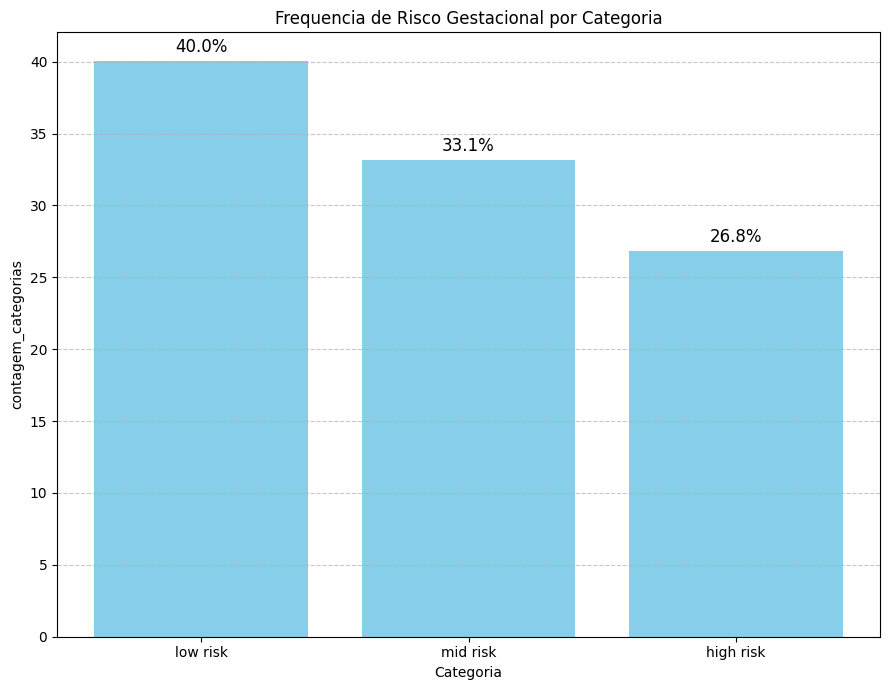

In [47]:
# 8. Análise de variável numérica - distribuição do risco gestacional

# Grafico de Barras para visualizarmos a frequenica (em qtde) de risco gestacional por tipo de risco

# 1. Preparação dos Dados para o Gráfico
#Para um gráfico de barras de contagem, primeiro precisamos contar a frequência de cada categoria.
#contagem_risco = Dataset['Nivel_Risco'].value_counts()
percentual_risco = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
# 2. Criação do gráfico de barras
# Prepara a figura e a area do grafico
plt.figure(figsize=(9, 7))


# É necessário armazenar o resultado de plt.bar() na variável 'bar_container', isso nos dá acesso aos objetos das barras para aplicar os rótulos.
bar_container = plt.bar(
    x=percentual_risco.index,     # Os nomes das categorias (Níveis de Risco) no eixo X
    height=percentual_risco.values, # As contagens (quantidades) no eixo Y
    color='skyblue' )       # Cor das barras


#Insere titulo no grafico
plt.title('Frequencia de Risco Gestacional por Categoria')

#Insere os rótulos nos eixos
plt.xlabel('Categoria')
plt.ylabel('contagem_categorias')

# Adiciona uma grade horizontal para facilitar a leitura dos valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Ajusta margens do grafico (para eliminar margens desnecessarias)
plt.tight_layout()

# Adiciona os Rótulos de Dados em Cima das Barras
# 'plt.bar_label()' é a função para isso, ela é chamada no 'bar_container' (o objeto que guarda as barras).
# 'fmt="%d"' formata os rótulos como números inteiros (sem casas decimais).

plt.bar_label(bar_container,
              fmt="%.1f%%",   # Formato percentual com uma casa decimal
              padding=4,      # Espaçamento entre a barra e o rótulo
              fontsize=12,    # Tamanho da fonte do rótulo
              color='black')  # Cor do texto do rótulo


plt.show() #mostra o gráfico

O gráfico de barras evidencia que temos 03 categorias de riscos no dataset, sendo elas da maior para a menor:
- 'Baixo Risco' com 406 registros
- 'Médio Risco' com 336 registros
- 'Alto Risco' com 272 registros

As 03 categorias acima somadas totalizam 1.014 registros evidenciando que não temos categorias vazias (missing) no data set.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [21]:
# estatísticas descritivas básicas do dataset
Dataset.describe()

,Idade,Pressao_Sistolica,Pressao_Diastolica,Nivel_Glicose,Temperatura_Corporal,Frequencia_Cardiaca
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [22]:
# média dos atributos numéricos do dataset
Dataset.describe().loc['mean']

,mean
Idade,29.871795
Pressao_Sistolica,113.198225
Pressao_Diastolica,76.460552
Nivel_Glicose,8.725986
Temperatura_Corporal,98.665089
Frequencia_Cardiaca,74.301775


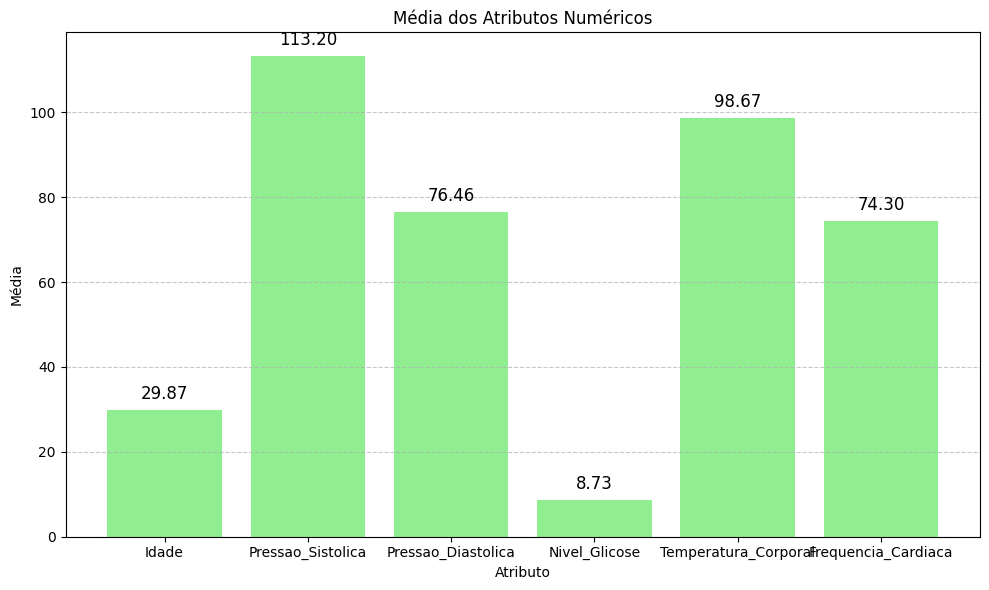

In [23]:
# prompt: gerar grafico de barras com a media acima

# Calcula a média dos atributos numéricos
media_atributos = Dataset.describe().loc['mean']

# Criação do gráfico de barras para as médias
plt.figure(figsize=(10, 6))

# Plota o gráfico de barras
bar_container = plt.bar(media_atributos.index, media_atributos.values, color='lightgreen')

# Adiciona título e rótulos aos eixos
plt.title('Média dos Atributos Numéricos')
plt.xlabel('Atributo')
plt.ylabel('Média')

# Adiciona uma grade horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os rótulos de dados (média) acima das barras
plt.bar_label(bar_container, fmt="%.2f", padding=5, fontsize=12, color='black') # Usando .2f para formatar a média com 2 casas decimais

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [24]:
# desvio padrão dos atributos numéricos do dataset
Dataset.describe().loc['std']

,std
Idade,13.474386
Pressao_Sistolica,18.403913
Pressao_Diastolica,13.885796
Nivel_Glicose,3.293532
Temperatura_Corporal,1.371384
Frequencia_Cardiaca,8.088702


In [ ]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

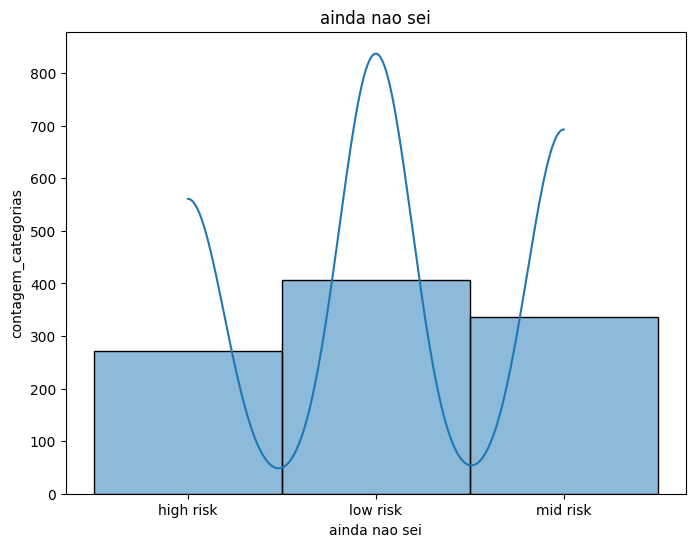

In [25]:
plt.figure(figsize=(8, 6))
# Histograma do Risco Gestacional
sns.histplot(Dataset['Nivel_Risco'], kde=True)
plt.title('ainda nao sei')
plt.xlabel('ainda nao sei')
plt.ylabel('contagem_categorias')
plt.show()

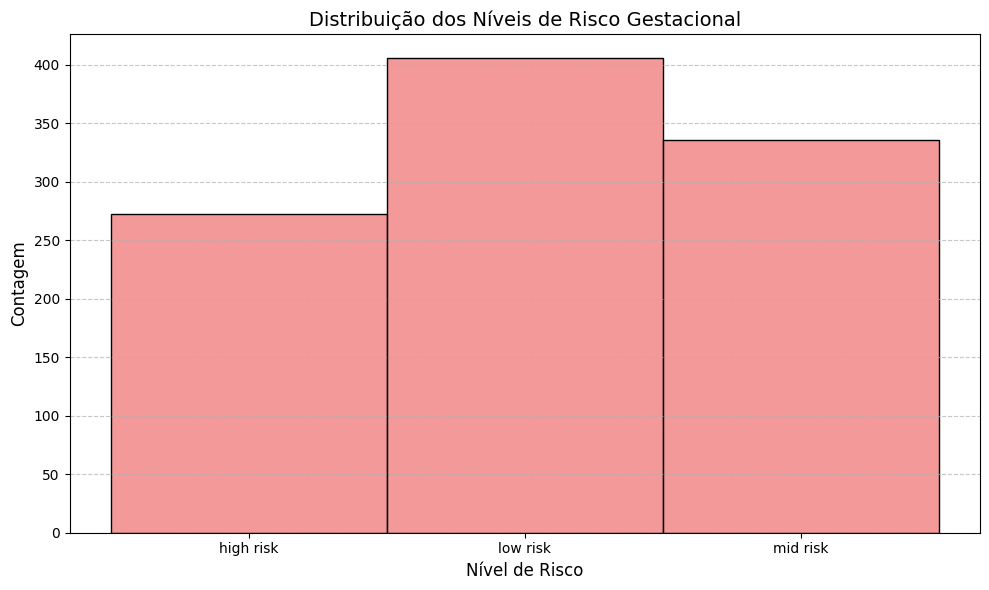


**Análise do Histograma 'Distribuição dos Níveis de Risco Gestacional':**

Este histograma visualiza a frequência de cada uma das categorias de 'RiskLevel' no dataset.
Ao contrário de um histograma tradicional para variáveis numéricas que mostra a distribuição contínua,
aqui ele age mais como um gráfico de barras de contagem para uma variável categórica.

Observamos as seguintes informações principais:

1.  **Categorias de Risco:** O gráfico exibe as três categorias de risco presentes no dataset: 'Low Risk', 'Mid Risk', e 'High Risk'.
2.  **Frequência das Categorias:** A altura de cada barra representa a contagem ou o número de gestantes em cada nível de risco.
    - A barra para 'Low Risk' é a mais alta, indicando que a maior parte das gestantes na amostra se enquadra nesta categoria.
    - A barra para 'Mid Risk' é a segunda mais alta.
    - A barra para 'High Risk' é a mais baixa, sugerindo que há menos gestantes na amostra com alto risco gestacional em comparação com os outros doi

In [26]:
# prompt: gerar grafico de histograma para o risk level e explicar o grafico

# Histograma do Risco Gestacional
plt.figure(figsize=(10, 6))
sns.histplot(Dataset  ['Nivel_Risco'], kde=False, color='lightcoral', alpha=0.8) # kde=False para histograma simples
plt.title('Distribuição dos Níveis de Risco Gestacional', fontsize=14)
plt.xlabel('Nível de Risco', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=0) # Mantém os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
**Análise do Histograma 'Distribuição dos Níveis de Risco Gestacional':**

Este histograma visualiza a frequência de cada uma das categorias de 'RiskLevel' no dataset.
Ao contrário de um histograma tradicional para variáveis numéricas que mostra a distribuição contínua,
aqui ele age mais como um gráfico de barras de contagem para uma variável categórica.

Observamos as seguintes informações principais:

1.  **Categorias de Risco:** O gráfico exibe as três categorias de risco presentes no dataset: 'Low Risk', 'Mid Risk', e 'High Risk'.
2.  **Frequência das Categorias:** A altura de cada barra representa a contagem ou o número de gestantes em cada nível de risco.
    - A barra para 'Low Risk' é a mais alta, indicando que a maior parte das gestantes na amostra se enquadra nesta categoria.
    - A barra para 'Mid Risk' é a segunda mais alta.
    - A barra para 'High Risk' é a mais baixa, sugerindo que há menos gestantes na amostra com alto risco gestacional em comparação com os outros dois níveis.

Este gráfico confirma visualmente a contagem de cada categoria de risco que foi mostrada anteriormente pela função `.value_counts()`. Ele fornece uma rápida compreensão da distribuição da variável alvo 'RiskLevel' no dataset, mostrando que a amostra não é perfeitamente balanceada entre as categorias.
""")


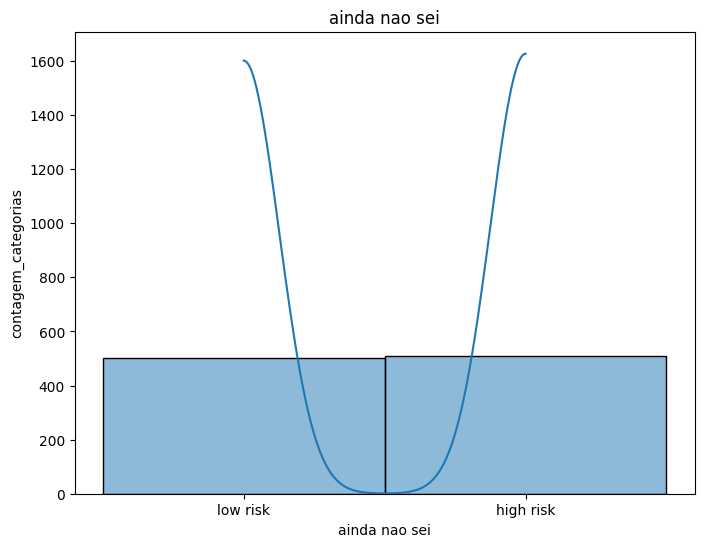

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do Risco Gestacional
sns.histplot(Base['Status_IdadeGestacional'], kde=True)
plt.title('ainda nao sei')
plt.xlabel('ainda nao sei')
plt.ylabel('contagem_categorias')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.



Alterar texto, analisar esse grafico bizarro

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

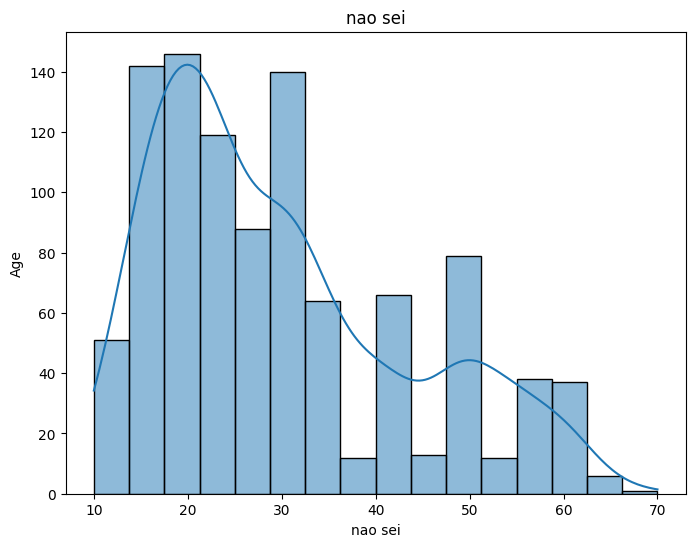

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(Base['Age'], kde=True)
plt.title('nao sei')
plt.xlabel('nao sei')
plt.ylabel('Age')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
Base.groupby('RiskLevel').describe()

Age                                                      \
           count       mean        std   min   25%   50%   75%   max   
RiskLevel                                                              
high risk  272.0  36.216912  13.032206  12.0  25.0  35.0  48.0  65.0   
low risk   406.0  26.869458  13.121661  10.0  17.0  22.0  32.0  70.0   
mid risk   336.0  28.363095  12.552660  10.0  19.0  25.0  32.0  60.0   

          SystolicBP              ... BodyTemp        HeartRate             \
               count        mean  ...      75%    max     count       mean   
RiskLevel                         ...                                        
high risk      272.0  124.194853  ...    100.0  103.0     272.0  76.742647   
low risk       406.0  105.866995  ...     98.0  103.0     406.0  72.770936   
mid risk       336.0  113.154762  ...    100.0  103.0     336.0  74.175595   

                                                   
                std   min   25%   50%   75%   max  
RiskLevel                                          
high risk  8.697878  60.0  70.0  77.0  86.0  90.0  
low risk   8.293341   7.0  70.0  70.0  77.0  88.0  
mid risk   6.767490  60.0  70.0  76.0  78.0  88.0  

[3 rows x 48 columns]

### *petal length* por Espécie


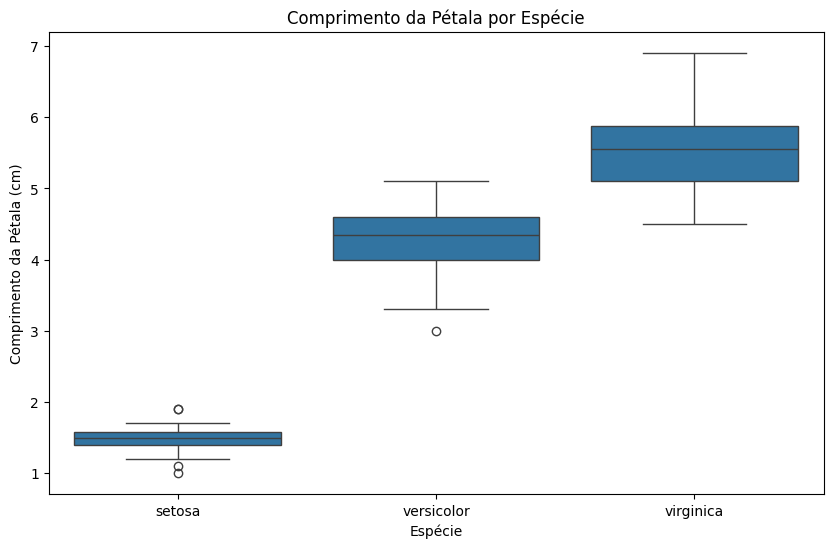

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

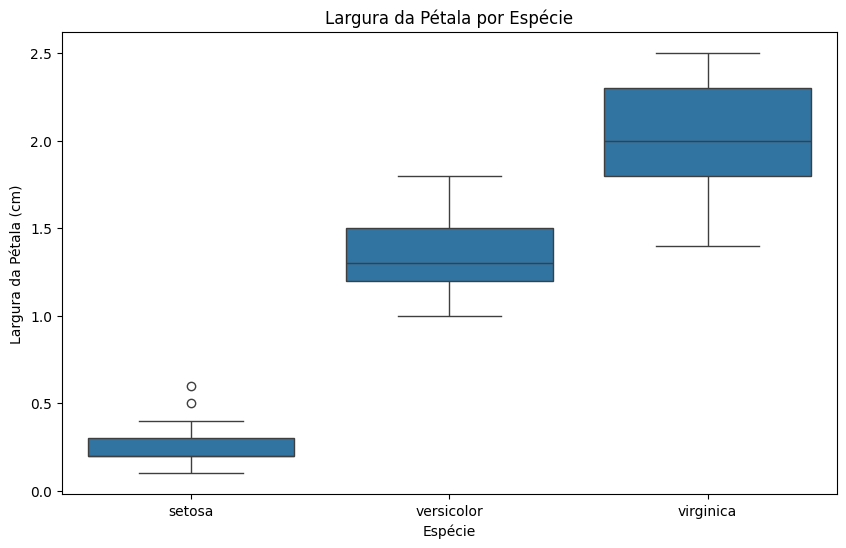

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


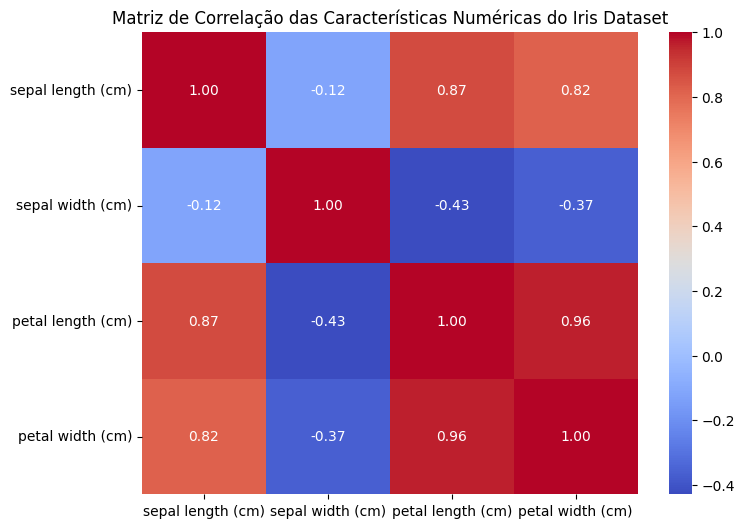

In [ ]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = Base.drop('RiskLevel', axis=1)
y = Base['RiskLevel']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

NameError: name 'train_test_split' is not defined

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


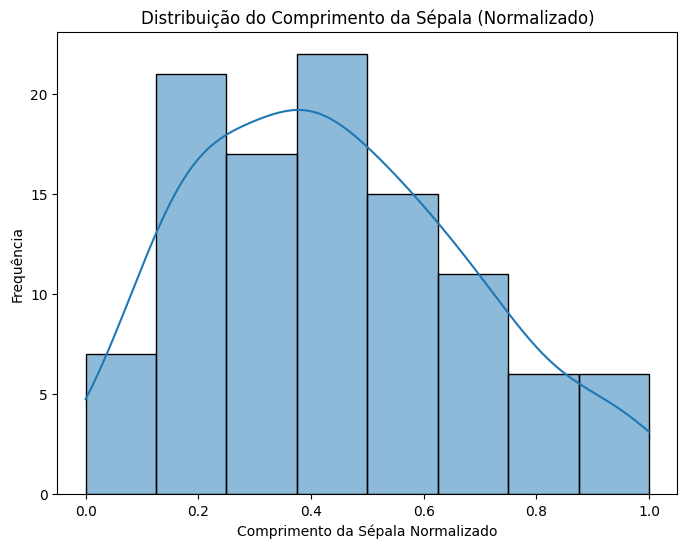

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


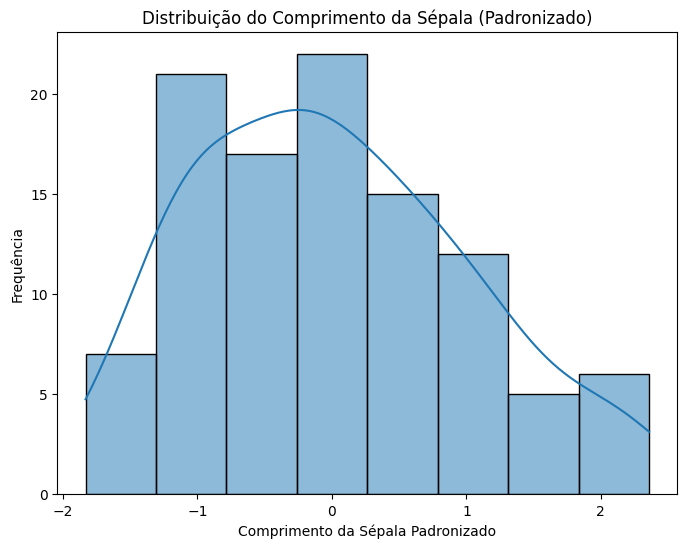

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.

### *Comprimento da Sépala*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

In [ ]:
# 'fmt="%d"' formata os rótulos como números inteiros (sem casas decimais).